In [525]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson, spearmanr, kendalltau

In [526]:
df_export = pd.read_csv("data/exports.csv", sep=',', skiprows=4)
df_export = df_export.drop(columns=["Indicator Name", "Indicator Code", "2024", "Unnamed: 69"])


In [527]:
df_military = pd.read_csv("data/military_expanditure.csv", sep=',', skiprows=4)
df_military = df_military.drop(columns=["Indicator Name", "Indicator Code", "2024", "Unnamed: 69"])

In [528]:
# 1. Define non-country keywords and allowlist
non_country_keywords = [
    "Africa", "Europe", "America", "Asia", "Oceania", "Arab", "World",
    "High income", "Low income", "Middle income", "Euro area", "OECD", "IDA",
    "IBRD", "G7", "G20", "Least developed", "Landlocked", "Small states", "Sub-Saharan",
    "Heavily indebted", "demographic dividend", "middle income", "Other"
]

# Manual override: countries that match keywords but are real countries
allowlist = {
    "Egypt, Arab Rep.", "Saudi Arabia", "South Africa",
    "Syrian Arab Republic", "United Arab Emirates", "Central African Republic"
}

# Define filter function
def is_region_or_group(name):
    return (
        any(keyword in str(name) for keyword in non_country_keywords)
        and name not in allowlist
    )


In [529]:
def clean_df(df):
    df = df[~df["Country Name"].apply(is_region_or_group)]
    mask = (df.iloc[:, 3:].fillna(0) != 0).any(axis=1)
    df = df[mask].reset_index(drop=True)
    return df

In [530]:
def filter_for_same_columns(df1, df2):
    set1 = set(df1["Country Name"])
    set2 = set(df2["Country Name"])

    common = set1 & set2

    df1_clean = df1[df1["Country Name"].isin(common)].reset_index(drop=True)
    df2_clean = df2[df2["Country Name"].isin(common)].reset_index(drop=True)
    return df1_clean, df2_clean


In [531]:
df_export = clean_df(df_export)


In [532]:
df_military = clean_df(df_military)


In [533]:
df_export, df_military = filter_for_same_columns(df_export, df_military)
df_military.head(200)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.682388e+08,1.995171e+08,1.858783e+08,1.914071e+08,1.980747e+08,2.263062e+08,2.795770e+08,2.782508e+08,NaN,NaN
1,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.846249e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,1.470939e+09,9.935944e+08,9.814510e+08,1.622764e+09,1.270158e+09
2,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.758867e+08,1.972259e+08,1.965963e+08,2.228145e+08,2.286932e+08,3.976176e+08
3,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275507e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,0.000000e+00,0.000000e+00,3.051624e+08,2.422198e+08,2.457405e+08,2.524076e+08,2.792254e+08,2.519307e+08,...,4.979443e+09,5.482617e+09,4.509648e+09,5.459644e+09,3.842852e+09,3.132655e+09,2.830930e+09,3.073433e+09,4.338261e+09,3.121892e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.357579e+07,4.998416e+07,5.193762e+07,5.726263e+07,6.334407e+07,6.570533e+07,7.896501e+07,7.960974e+07,1.076016e+08,1.331855e+08
154,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.714831e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,South Africa,ZAF,6.999997e+07,1.137500e+08,1.861999e+08,1.889999e+08,2.715999e+08,2.894499e+08,3.244499e+08,3.730999e+08,...,3.892485e+09,3.488868e+09,3.139312e+09,3.591508e+09,3.622919e+09,3.435430e+09,3.231018e+09,3.392816e+09,3.110121e+09,2.781117e+09
156,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.436047e+08,3.724476e+08,2.995048e+08,3.396645e+08,3.780254e+08,2.920725e+08,2.121424e+08,2.175772e+08,3.260788e+08,3.771721e+08


In [534]:
df_export.head(200)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,2.222223e+07,2.444446e+07,2.666668e+07,6.888892e+07,7.111114e+07,1.133333e+08,1.200000e+08,1.133333e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,2.079571e+09,2.045190e+09,2.664600e+09,2.890868e+09
1,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.077040e+10,2.692685e+10,1.483893e+10,2.137317e+10,3.244471e+10,2.891981e+10,1.858315e+10,3.175306e+10,4.634476e+10,3.465662e+10
2,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.732057e+09,3.104898e+09,3.437127e+09,4.110301e+09,4.785182e+09,4.821429e+09,3.435540e+09,5.613909e+09,7.073860e+09,9.104536e+09
3,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.027281e+11,3.585296e+11,3.606263e+11,3.821375e+11,4.002178e+11,4.048632e+11,3.502774e+11,4.251559e+11,5.218973e+11,5.584015e+11
4,Argentina,ARG,NaN,NaN,1.147184e+09,1.441754e+09,1.424603e+09,1.764706e+09,1.904762e+09,1.818182e+09,...,7.581887e+10,6.367179e+10,6.984260e+10,7.286056e+10,7.576660e+10,8.025948e+10,6.405381e+10,8.790612e+10,1.028158e+11,8.236973e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.664385e+09,1.413506e+09,1.592309e+09,1.962420e+09,2.289053e+09,2.315619e+09,1.674246e+09,3.144941e+09,3.613393e+09,4.149652e+09
154,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.287267e+09,3.841896e+09,1.506135e+09,2.600534e+09,1.891748e+09,NaN,NaN,NaN,NaN,NaN
155,South Africa,ZAF,2.238599e+09,2.337999e+09,2.498999e+09,2.696399e+09,2.846199e+09,2.913399e+09,3.123399e+09,3.385199e+09,...,1.105500e+11,9.608590e+10,9.110902e+10,1.042884e+11,1.114347e+11,1.059061e+11,9.319960e+10,1.309110e+11,1.357951e+11,1.246962e+11
156,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.053677e+10,7.892389e+09,7.403491e+09,9.053912e+09,9.987165e+09,8.073235e+09,8.473998e+09,1.153788e+10,1.172209e+10,1.126453e+10


In [535]:
df = df_export.merge(df_military, on="Country Name", suffixes=("_exp", "_mil"))

# 4) Korrelation pro Land berechnen
results = []
for _, row in df.iterrows():
    country = row["Country Name"]
    # Zeitreihen in numpy-Arrays
    x = pd.to_numeric(row[[f"{y}_exp" for y in years]], errors="coerce").to_numpy()
    y = pd.to_numeric(row[[f"{y}_mil" for y in years]], errors="coerce").to_numpy()
    
    # Nur valide Paare (nicht-NaN, nicht 0)
    mask = (~np.isnan(x)) & (x != 0) & (~np.isnan(y)) & (y != 0)
    x_valid = x[mask]
    y_valid = y[mask]
    if len(x_valid) < 3:
        # für mindestens 3 Wertepaare sinnvoll
        continue
    
    # Spearman ρ
    rho, p_s = spearmanr(x_valid, y_valid)
    # Kendall's τ_b
    tau, p_k = kendalltau(x_valid, y_valid)
    
    results.append({
        "Country Name": country,
        "n Jahre": len(x_valid),
        "Spearman ρ": round(rho, 3),
        "p-Spearman": round(p_s, 3),
        "Kendall τ_b": round(tau, 3),
        "p-Kendall": round(p_k, 3)
    })

# 5) In DataFrame und CSV
df_country_corr = pd.DataFrame(results) \
    .sort_values("Spearman ρ", ascending=False) \
    .reset_index(drop=True)

print(df_country_corr)
df_country_corr.to_csv("results/export_correlations.csv", index=False)


               Country Name  n Jahre  Spearman ρ  p-Spearman  Kendall τ_b  \
0                 Singapore       54       0.992       0.000        0.950   
1                     China       35       0.991       0.000        0.946   
2                 Australia       64       0.991       0.000        0.937   
3                Bangladesh       51       0.991       0.000        0.944   
4                    Mexico       64       0.991       0.000        0.933   
..                      ...      ...         ...         ...          ...   
152                  Guyana       30      -0.160       0.398       -0.076   
153             South Sudan        8      -0.262       0.531       -0.071   
154                 Lao PDR       22      -0.412       0.057       -0.177   
155  Bosnia and Herzegovina       22      -0.486       0.022       -0.333   
156                 Eritrea       11      -0.755       0.007       -0.600   

     p-Kendall  
0        0.000  
1        0.000  
2        0.000  
3      

In [536]:
df_military = pd.read_csv("data/military_expanditure.csv", sep=',', skiprows=4)
df_military = df_military.drop(columns=["Indicator Name", "Indicator Code", "2024", "Unnamed: 69"])
df_military = clean_df(df_military)

In [537]:
df_gdp = pd.read_csv("data/gdp.csv", sep=',', skiprows=4)
df_gdp = df_gdp.drop(columns=["Indicator Name", "Indicator Code", "2024", "Unnamed: 69"])
df_gdp = clean_df(df_gdp)

In [538]:
df_gdp, df_military = filter_for_same_columns(df_gdp, df_military)
df_military.head(200)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.682388e+08,1.995171e+08,1.858783e+08,1.914071e+08,1.980747e+08,2.263062e+08,2.795770e+08,2.782508e+08,NaN,NaN
1,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.846249e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,1.470939e+09,9.935944e+08,9.814510e+08,1.622764e+09,1.270158e+09
2,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.758867e+08,1.972259e+08,1.965963e+08,2.228145e+08,2.286932e+08,3.976176e+08
3,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275507e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,0.000000e+00,0.000000e+00,3.051624e+08,2.422198e+08,2.457405e+08,2.524076e+08,2.792254e+08,2.519307e+08,...,4.979443e+09,5.482617e+09,4.509648e+09,5.459644e+09,3.842852e+09,3.132655e+09,2.830930e+09,3.073433e+09,4.338261e+09,3.121892e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.357579e+07,4.998416e+07,5.193762e+07,5.726263e+07,6.334407e+07,6.570533e+07,7.896501e+07,7.960974e+07,1.076016e+08,1.331855e+08
161,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.714831e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,South Africa,ZAF,6.999997e+07,1.137500e+08,1.861999e+08,1.889999e+08,2.715999e+08,2.894499e+08,3.244499e+08,3.730999e+08,...,3.892485e+09,3.488868e+09,3.139312e+09,3.591508e+09,3.622919e+09,3.435430e+09,3.231018e+09,3.392816e+09,3.110121e+09,2.781117e+09
163,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.436047e+08,3.724476e+08,2.995048e+08,3.396645e+08,3.780254e+08,2.920725e+08,2.121424e+08,2.175772e+08,3.260788e+08,3.771721e+08


In [539]:
df_gdp.head(200)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10
1,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.482465e+10
2,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.537951e+10,1.558511e+10,1.524146e+10,1.803201e+10,1.901724e+10,2.354718e+10
3,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.141054e+11,3.702755e+11,3.692553e+11,3.905168e+11,4.270494e+11,4.179897e+11,3.494730e+11,4.151788e+11,5.027319e+11,5.141304e+11
4,Argentina,ARG,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,2.863047e+10,2.425667e+10,...,5.263197e+11,5.947493e+11,5.575323e+11,6.436284e+11,5.248199e+11,4.477547e+11,3.857405e+11,4.865641e+11,6.327901e+11,6.460753e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.046822e+10
161,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
162,South Africa,ZAF,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,...,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.052607e+11,3.893300e+11,3.379747e+11,4.208869e+11,4.069200e+11,3.806993e+11
163,Zambia,ZMB,6.987397e+08,6.823597e+08,6.792797e+08,7.043397e+08,8.226397e+08,1.061200e+09,1.239000e+09,1.340639e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.757796e+10


In [540]:
df = df_gdp.merge(df_military, on="Country Name", suffixes=("_gdp", "_mil"))

# 4) Korrelation pro Land berechnen
results = []
for _, row in df.iterrows():
    country = row["Country Name"]
    # Zeitreihen in numpy-Arrays
    x = pd.to_numeric(row[[f"{y}_gdp" for y in years]], errors="coerce").to_numpy()
    y = pd.to_numeric(row[[f"{y}_mil" for y in years]], errors="coerce").to_numpy()
    
    # Nur valide Paare (nicht-NaN, nicht 0)
    mask = (~np.isnan(x)) & (x != 0) & (~np.isnan(y)) & (y != 0)
    x_valid = x[mask]
    y_valid = y[mask]
    
    if len(x_valid) < 3:
        # für mindestens 3 Wertepaare sinnvoll
        continue
    
    # Spearman ρ
    rho, p_s = spearmanr(x_valid, y_valid)
    # Kendall's τ_b
    tau, p_k = kendalltau(x_valid, y_valid)
    
    results.append({
        "Country Name": country,
        "n Jahre": len(x_valid),
        "Spearman ρ": round(rho, 3),
        "p-Spearman": round(p_s, 3),
        "Kendall τ_b": round(tau, 3),
        "p-Kendall": round(p_k, 3)
    })

# 5) In DataFrame und CSV
df_country_corr = pd.DataFrame(results) \
    .sort_values("Spearman ρ", ascending=False) \
    .reset_index(drop=True)

print(df_country_corr)
df_country_corr.to_csv("results/gdp_correlations.csv", index=False)

               Country Name  n Jahre  Spearman ρ  p-Spearman  Kendall τ_b  \
0                Uzbekistan       10       1.000       0.000        1.000   
1               Korea, Rep.       64       0.997       0.000        0.970   
2                   Estonia       31       0.996       0.000        0.970   
3                     India       64       0.995       0.000        0.959   
4                     China       35       0.995       0.000        0.970   
..                      ...      ...         ...         ...          ...   
160                 Croatia       32       0.339       0.057        0.383   
161            Turkmenistan        6       0.143       0.787        0.200   
162             South Sudan        8      -0.167       0.693       -0.071   
163  Bosnia and Herzegovina       22      -0.203       0.366       -0.143   
164                 Lao PDR       22      -0.309       0.162       -0.108   

     p-Kendall  
0        0.000  
1        0.000  
2        0.000  
3      

In [541]:
results = []
for _, row in df.iterrows():
    country = row["Country Name"]
    # a) Level-Werte
    gdp = pd.to_numeric(row[[f"{y}_gdp" for y in years]], errors="coerce").to_numpy()
    mil = pd.to_numeric(row[[f"{y}_mil" for y in years]], errors="coerce").to_numpy()
    
    # b) Maske: nur Jahre mit beiden Werten > 0
    mask = (~np.isnan(gdp)) & (gdp > 0) & (~np.isnan(mil)) & (mil > 0)
    gdp, mil = gdp[mask], mil[mask]
    
    # Mindestanforderung für Differenzen
    if len(gdp) < 4:
        continue
    
    # c) Militär-Anteil am BIP
    share = mil / gdp
    
    # d) jährliche prozentuale Veränderung
    share_pct = share[1:] / share[:-1] - 1

    # e) Bei konstanter Serie keine Korrelation
    if np.allclose(share_pct, share_pct[0]):
        rho_s = p_s = tau_k = p_k = np.nan
    else:
        idx = np.arange(len(share_pct))
        rho_s, p_s = spearmanr(idx, share_pct)
        tau_k, p_k = kendalltau(idx, share_pct)
    
    results.append({
        "Country Name": country,
        "n Jahre": len(share),
        "n Änderungen": len(share_pct),
        "Spearman ρ (Trend)": None if np.isnan(rho_s) else round(rho_s, 3),
        "p-Spearman": None if np.isnan(p_s) else round(p_s, 3),
        "Kendall τ_b (Trend)": None if np.isnan(tau_k) else round(tau_k, 3),
        "p-Kendall": None if np.isnan(p_k) else round(p_k, 3)
    })

# 4) Ausgabe
df_trend = pd.DataFrame(results) \
    .sort_values("Spearman ρ (Trend)", ascending=False, na_position='last') \
    .reset_index(drop=True)

print(df_trend)
df_trend.to_csv("results/mil_share_trend.csv", index=False)

               Country Name  n Jahre  n Änderungen  Spearman ρ (Trend)  \
0    Bosnia and Herzegovina       22            21               0.500   
1               Afghanistan       18            17               0.466   
2           North Macedonia       28            27               0.443   
3                   Lao PDR       22            21               0.405   
4               South Sudan        8             7               0.321   
..                      ...      ...           ...                 ...   
160                  Uganda       63            62              -0.340   
161                 Estonia       31            30              -0.352   
162        Egypt, Arab Rep.       62            61              -0.352   
163                 Ireland       64            63              -0.364   
164              Kazakhstan       30            29              -0.395   

     p-Spearman  Kendall τ_b (Trend)  p-Kendall  
0         0.021                0.352      0.026  
1         0

In [542]:
df_military = pd.read_csv("data/military_expanditure.csv", sep=',', skiprows=4)
df_military = df_military.drop(columns=["Indicator Name", "Indicator Code", "2024", "Unnamed: 69"])
df_military = clean_df(df_military)

In [543]:
df_import = pd.read_csv("data/imports.csv", sep=',', skiprows=4)
df_import = df_import.drop(columns=["Indicator Name", "Indicator Code", "2024", "Unnamed: 69"])
df_import = clean_df(df_import)

In [544]:
df_import, df_military = filter_for_same_columns(df_import, df_military)
df_military.head(200)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.682388e+08,1.995171e+08,1.858783e+08,1.914071e+08,1.980747e+08,2.263062e+08,2.795770e+08,2.782508e+08,NaN,NaN
1,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.846249e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,1.470939e+09,9.935944e+08,9.814510e+08,1.622764e+09,1.270158e+09
2,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.758867e+08,1.972259e+08,1.965963e+08,2.228145e+08,2.286932e+08,3.976176e+08
3,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275507e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,0.000000e+00,0.000000e+00,3.051624e+08,2.422198e+08,2.457405e+08,2.524076e+08,2.792254e+08,2.519307e+08,...,4.979443e+09,5.482617e+09,4.509648e+09,5.459644e+09,3.842852e+09,3.132655e+09,2.830930e+09,3.073433e+09,4.338261e+09,3.121892e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.357579e+07,4.998416e+07,5.193762e+07,5.726263e+07,6.334407e+07,6.570533e+07,7.896501e+07,7.960974e+07,1.076016e+08,1.331855e+08
155,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.714831e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,South Africa,ZAF,6.999997e+07,1.137500e+08,1.861999e+08,1.889999e+08,2.715999e+08,2.894499e+08,3.244499e+08,3.730999e+08,...,3.892485e+09,3.488868e+09,3.139312e+09,3.591508e+09,3.622919e+09,3.435430e+09,3.231018e+09,3.392816e+09,3.110121e+09,2.781117e+09
157,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.436047e+08,3.724476e+08,2.995048e+08,3.396645e+08,3.780254e+08,2.920725e+08,2.121424e+08,2.175772e+08,3.260788e+08,3.771721e+08


In [545]:
df_import.head(200)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,3.777778e+07,4.444445e+07,5.111111e+07,1.266667e+08,1.444445e+08,2.155555e+08,2.600000e+08,2.377778e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,7.241823e+09,5.286118e+09,7.901785e+09,8.702382e+09
1,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.709604e+10,2.998501e+10,1.332003e+10,1.713497e+10,2.029308e+10,1.208015e+10,1.339976e+10,1.776965e+10,2.641254e+10,2.221126e+10
2,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.243004e+09,5.070977e+09,5.436221e+09,6.070376e+09,6.856195e+09,6.926960e+09,5.636282e+09,8.016544e+09,9.033376e+09,1.032040e+10
3,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.751110e+11,2.689993e+11,2.707148e+11,2.853370e+11,2.815357e+11,3.060041e+11,2.972282e+11,3.475289e+11,4.279918e+11,4.818516e+11
4,Argentina,ARG,NaN,NaN,2.294367e+09,1.441753e+09,1.424603e+09,1.176471e+09,1.428571e+09,1.212121e+09,...,7.369168e+10,7.006488e+10,7.563925e+10,8.991050e+10,8.568131e+10,6.584562e+10,5.245409e+10,7.304291e+10,9.681494e+10,8.974804e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.788279e+09,3.246709e+09,3.420957e+09,3.811643e+09,4.511505e+09,4.458675e+09,4.160534e+09,6.140292e+09,6.678126e+09,7.360350e+09
155,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.225664e+10,9.586495e+09,8.717967e+09,9.465701e+09,1.083477e+10,NaN,NaN,NaN,NaN,NaN
156,South Africa,ZAF,1.860599e+09,1.698199e+09,1.755599e+09,2.185399e+09,2.647399e+09,3.035199e+09,2.858799e+09,3.337599e+09,...,1.162617e+11,1.005910e+11,8.964991e+10,9.992378e+10,1.093738e+11,1.039350e+11,7.835518e+10,1.049318e+11,1.278199e+11,1.234439e+11
157,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.014293e+10,9.079953e+09,8.097049e+09,9.467885e+09,9.717094e+09,7.961078e+09,5.892355e+09,7.511107e+09,8.487628e+09,1.031299e+10


In [546]:
df = df_import.merge(df_military, on="Country Name", suffixes=("_imp", "_mil"))

# 4) Korrelation pro Land berechnen
results = []
for _, row in df.iterrows():
    country = row["Country Name"]
    # Zeitreihen in numpy-Arrays
    x = pd.to_numeric(row[[f"{y}_imp" for y in years]], errors="coerce").to_numpy()
    y = pd.to_numeric(row[[f"{y}_mil" for y in years]], errors="coerce").to_numpy()
    
    # Nur valide Paare (nicht-NaN, nicht 0)
    mask = (~np.isnan(x)) & (x != 0) & (~np.isnan(y)) & (y != 0)
    x_valid = x[mask]
    y_valid = y[mask]
    
    if len(x_valid) < 3:
        # für mindestens 3 Wertepaare sinnvoll
        continue
    
    # Spearman ρ
    rho, p_s = spearmanr(x_valid, y_valid)
    # Kendall's τ_b
    tau, p_k = kendalltau(x_valid, y_valid)
    
    results.append({
        "Country Name": country,
        "n Jahre": len(x_valid),
        "Spearman ρ": round(rho, 3),
        "p-Spearman": round(p_s, 3),
        "Kendall τ_b": round(tau, 3),
        "p-Kendall": round(p_k, 3)
    })

# 5) In DataFrame und CSV
df_country_corr = pd.DataFrame(results) \
    .sort_values("Spearman ρ", ascending=False) \
    .reset_index(drop=True)

print(df_country_corr)
df_country_corr.to_csv("results/import_correlations.csv", index=False)

               Country Name  n Jahre  Spearman ρ  p-Spearman  Kendall τ_b  \
0               Afghanistan        8       1.000       0.000        1.000   
1                     Nepal       54       0.992       0.000        0.937   
2                     China       35       0.992       0.000        0.946   
3                 Singapore       54       0.991       0.000        0.943   
4                Luxembourg       54       0.990       0.000        0.939   
..                      ...      ...         ...         ...          ...   
153                  Guyana       30      -0.117       0.539       -0.053   
154  Bosnia and Herzegovina       22      -0.240       0.282       -0.169   
155            Turkmenistan        6      -0.314       0.544       -0.333   
156                 Lao PDR       22      -0.319       0.148       -0.134   
157             South Sudan        8      -0.595       0.120       -0.286   

     p-Kendall  
0        0.000  
1        0.000  
2        0.000  
3      

In [547]:
year_cols = [c for c in df_export.columns if c.isdigit()]

# 3) Setze Country Name als Index (optional, macht's übersichtlicher)
df_exp2 = df_export.set_index("Country Name")
df_imp2 = df_import.set_index("Country Name")

# 4) Berechne den Überschuss je Jahr
df_surplus = df_exp2[year_cols] - df_imp2[year_cols]

# 5) (Optional) Index zurück als Spalte
df_surplus = df_surplus.reset_index()

# 6) Ergebnis anschauen und speichern
print(df_surplus.head())
df_surplus.to_csv("results/trade_surplus_wide.csv", index=False)

  Country Name          1960          1961          1962          1963  \
0  Afghanistan -1.555555e+07 -1.999999e+07 -2.444443e+07 -5.777780e+07   
1      Albania           NaN           NaN           NaN           NaN   
2      Algeria -7.653484e+08 -5.176081e+08 -2.051028e+07 -3.281645e+08   
3       Angola           NaN           NaN           NaN           NaN   
4    Argentina           NaN           NaN -1.147183e+09  3.964821e+02   

           1964          1965          1966          1967          1968  ...  \
0 -7.333331e+07 -1.022222e+08 -1.400000e+08 -1.244444e+08 -8.666667e+07  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2 -1.267212e+08 -1.012748e+08  4.050994e+07  6.076491e+07 -4.050994e+07  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4  3.917658e+02  5.882353e+08  4.761905e+08  6.060606e+08  2.857142e+08  ...   

           2014          2015          2016          2017          2018  \

In [548]:
df_surplus, df_military = filter_for_same_columns(df_surplus, df_military)
df_military.head(200)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.682388e+08,1.995171e+08,1.858783e+08,1.914071e+08,1.980747e+08,2.263062e+08,2.795770e+08,2.782508e+08,NaN,NaN
1,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.846249e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,1.470939e+09,9.935944e+08,9.814510e+08,1.622764e+09,1.270158e+09
2,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.758867e+08,1.972259e+08,1.965963e+08,2.228145e+08,2.286932e+08,3.976176e+08
3,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275507e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,0.000000e+00,0.000000e+00,3.051624e+08,2.422198e+08,2.457405e+08,2.524076e+08,2.792254e+08,2.519307e+08,...,4.979443e+09,5.482617e+09,4.509648e+09,5.459644e+09,3.842852e+09,3.132655e+09,2.830930e+09,3.073433e+09,4.338261e+09,3.121892e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.357579e+07,4.998416e+07,5.193762e+07,5.726263e+07,6.334407e+07,6.570533e+07,7.896501e+07,7.960974e+07,1.076016e+08,1.331855e+08
155,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.714831e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,South Africa,ZAF,6.999997e+07,1.137500e+08,1.861999e+08,1.889999e+08,2.715999e+08,2.894499e+08,3.244499e+08,3.730999e+08,...,3.892485e+09,3.488868e+09,3.139312e+09,3.591508e+09,3.622919e+09,3.435430e+09,3.231018e+09,3.392816e+09,3.110121e+09,2.781117e+09
157,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.436047e+08,3.724476e+08,2.995048e+08,3.396645e+08,3.780254e+08,2.920725e+08,2.121424e+08,2.175772e+08,3.260788e+08,3.771721e+08


In [549]:
df = df_surplus.merge(df_military, on="Country Name", suffixes=("_surp", "_mil"))

# 4) Korrelation pro Land berechnen
results = []
for _, row in df.iterrows():
    country = row["Country Name"]
    # Zeitreihen in numpy-Arrays
    x = pd.to_numeric(row[[f"{y}_surp" for y in years]], errors="coerce").to_numpy()
    y = pd.to_numeric(row[[f"{y}_mil" for y in years]], errors="coerce").to_numpy()
    
    # Nur valide Paare (nicht-NaN, nicht 0)
    mask = (~np.isnan(x)) & (x != 0) & (~np.isnan(y)) & (y != 0)
    x_valid = x[mask]
    y_valid = y[mask]
    
    if len(x_valid) < 3:
        # für mindestens 3 Wertepaare sinnvoll
        continue
    
    # Spearman ρ
    rho, p_s = spearmanr(x_valid, y_valid)
    # Kendall's τ_b
    tau, p_k = kendalltau(x_valid, y_valid)
    
    results.append({
        "Country Name": country,
        "n Jahre": len(x_valid),
        "Spearman ρ": round(rho, 3),
        "p-Spearman": round(p_s, 3),
        "Kendall τ_b": round(tau, 3),
        "p-Kendall": round(p_k, 3)
    })

# 5) In DataFrame und CSV
df_country_corr = pd.DataFrame(results) \
    .sort_values("Spearman ρ", ascending=False) \
    .reset_index(drop=True)

print(df_country_corr)
df_country_corr.to_csv("results/surplus_correlations.csv", index=False)

        Country Name  n Jahre  Spearman ρ  p-Spearman  Kendall τ_b  p-Kendall
0          Singapore       54       0.980         0.0        0.898        0.0
1         Luxembourg       54       0.961         0.0        0.842        0.0
2        Netherlands       55       0.943         0.0        0.797        0.0
3              Qatar       11       0.936         0.0        0.855        0.0
4            Denmark       58       0.910         0.0        0.722        0.0
..               ...      ...         ...         ...          ...        ...
152  Kyrgyz Republic       30      -0.916         0.0       -0.766        0.0
153         Honduras       57      -0.916         0.0       -0.760        0.0
154        Sri Lanka       58      -0.941         0.0       -0.792        0.0
155       Bangladesh       51      -0.955         0.0       -0.835        0.0
156            Nepal       54      -0.986         0.0       -0.913        0.0

[157 rows x 6 columns]


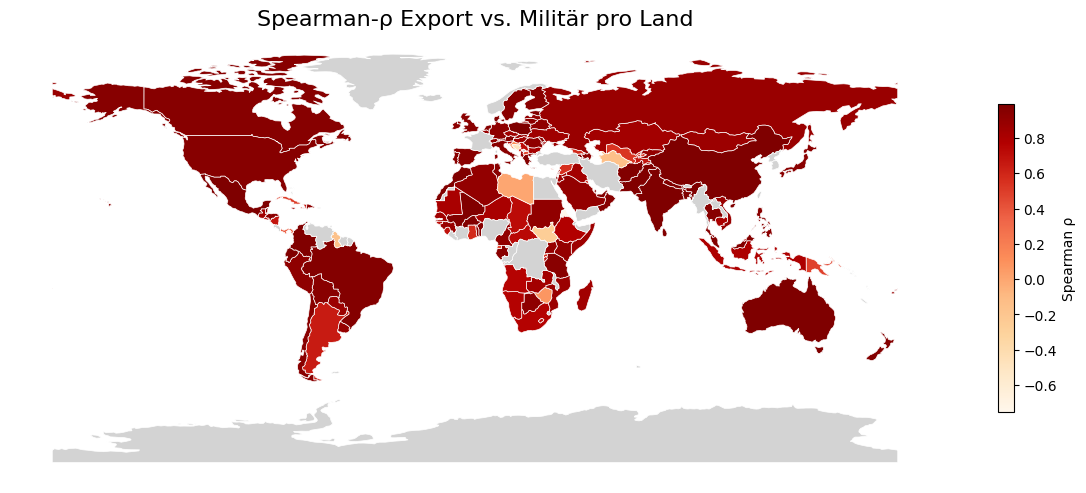

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) Korrelationsdaten
df_corr = pd.read_csv('results/export_correlations.csv')

# 2) Country Name an ISO-Codes mappen (für robusten Merge)
import pycountry
def iso3(name):
    try: return pycountry.countries.lookup(name).alpha_3
    except: return None

df_corr['iso_a3'] = df_corr['Country Name'].apply(iso3)

# 3) Lade das Admin-0 Shapefile direkt aus dem Netz
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# 4) Merge über ISO-Alpha-3
gdf = world.merge(df_corr, left_on="ISO_A3", right_on="iso_a3", how="left")

# 5) Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
gdf.plot(
    column='Spearman ρ',
    cmap='OrRd',
    linewidth=0.5,
    edgecolor='white',
    missing_kwds={'color': 'lightgrey', 'label': 'no data'},
    legend=True,
    legend_kwds={'label': "Spearman ρ", 'shrink': 0.5},
    ax=ax
)
ax.set_title("Spearman-ρ Export vs. Militär pro Land", fontsize=16)
ax.set_axis_off()
plt.show()


In [11]:
import geodatasets

# Liste aller verfügbaren Datensätze ausgeben
print(geodatasets.data)

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip', 'license': 'NA', 'attribution': 'Center for Spatial Data Science, University of Chicago', 'name': 'geoda.airbnb', 'description': 'Airbnb rentals, socioeconomics, and crime in Chicago', 'geometry_type': 'Polygon', 'nrows': 77, 'ncols': 21, 'details': 'https://geodacenter.github.io/data-and-lab//airbnb/', 'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824', 'filename': 'airbnb.zip'}, 'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip', 'license': 'NA', 'attribution': 'Center for Spatial Data Science, University of Chicago', 'name': 'geoda.atlanta', 'description': 'Atlanta, GA region homicide counts and rates', 'geometry_type': 'Polygon', 'nrows': 90, 'ncols': 24, 'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/', 'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09', 'filename': 'atlanta_hom.zip', 'me

In [1]:
import pandas as pd
import pycountry
import plotly.express as px

# 1) Korrelationsdaten laden
df_corr = pd.read_csv('results/export_correlations.csv')

# 2) ISO-Alpha-3 Codes ermitteln
def iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

df_corr['iso_a3'] = df_corr['Country Name'].apply(iso3)

# 3) Ungültige Einträge entfernen
df_map = df_corr.dropna(subset=['iso_a3'])

# 4) Interaktive Choropleth-Karte
fig = px.choropleth(
    df_map,
    locations='iso_a3',
    color='Spearman ρ',
    hover_name='Country Name',
    color_continuous_scale='OrRd',
    projection='natural earth',
    title='Interaktive Spearman-ρ Karte: Export vs. Militär'
)

fig.update_geos(showcoastlines=True, showland=True, fitbounds='locations')
fig.update_layout(margin={'r':0,'t':40,'l':0,'b':0})
fig.show()


In [2]:
import pandas as pd
import pycountry
import plotly.express as px

# 1) Korrelationsdaten laden
df_corr = pd.read_csv('results/export_correlations.csv')

# 2) ISO-Alpha-3 Codes ermitteln
def iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

df_corr['iso_a3'] = df_corr['Country Name'].apply(iso3)

# 3) Ungültige Einträge entfernen
df_map = df_corr.dropna(subset=['iso_a3'])

# 4) Interaktive Choropleth-Karte für Kendall τ_b
fig = px.choropleth(
    df_map,
    locations='iso_a3',
    color='Kendall τ_b',
    hover_name='Country Name',
    color_continuous_scale='Blues',
    projection='natural earth',
    title='Interaktive Kendall τ_b Karte: Export vs. Militär'
)

fig.update_geos(showcoastlines=True, showland=True, fitbounds='locations')
fig.update_layout(margin={'r':0,'t':40,'l':0,'b':0})
fig.show()
